<a href="https://colab.research.google.com/github/rameshc70707/EDA/blob/main/Module3_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Analysis

- Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.
- Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual.
- Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

###Why even analyze a time series?
- Because it is the preparatory step before you develop a forecast of the series.
- Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.


###Understanding the time series dataset
* A time series is a collection of observations made sequentially in time.
* There are two important key phrases here
  - a collection of observations and
  - sequentially in time.

Examples:
 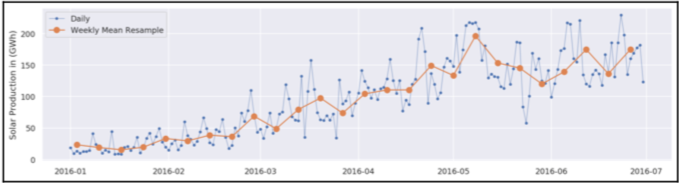

 The preceding screenshot illustrates solar energy production (measured in Gigawatt Hours (GWh)) for the first six months of 2016. It also shows the consumption of electricity on both a daily and weekly basis.

###Components of TSA
* Time Frame (How far can we predict?)
  - short-term (1 - 2 periods)
  - medium-term (5 - 10 periods)
  - long-term (12+ periods)
  - No line of demarcation
* Trend
  - Gradual, long-term movement (up or down) of demand.
  - Easiest to detect
* Cycle
  - An up-and-down repetitive movement in demand.
  - repeats itself over a long period of time
* Seasonal Variation
  - An up-and-down repetitive movement within a trend occurring periodically.
  - Often weather related but could be daily or weekly occurrence
* Random Variations
  - Erratic movements that are not predictable because they do not follow a pattern

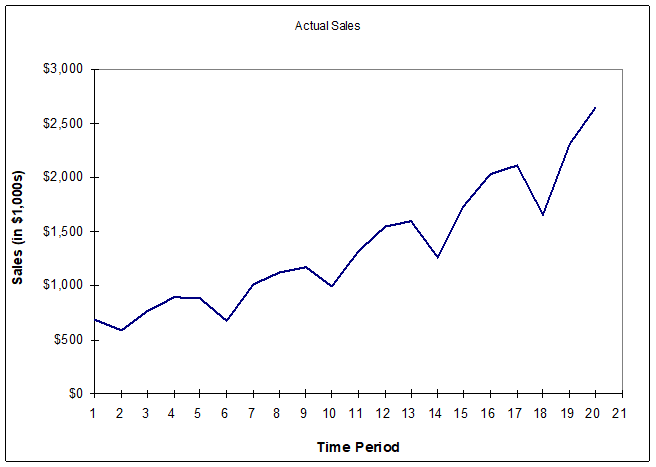

* Difficult to forecast demand because...
  - There are no causal variables
  - The components (trend, seasonality, cycles, and random variation) cannot always be easily or accurately identified

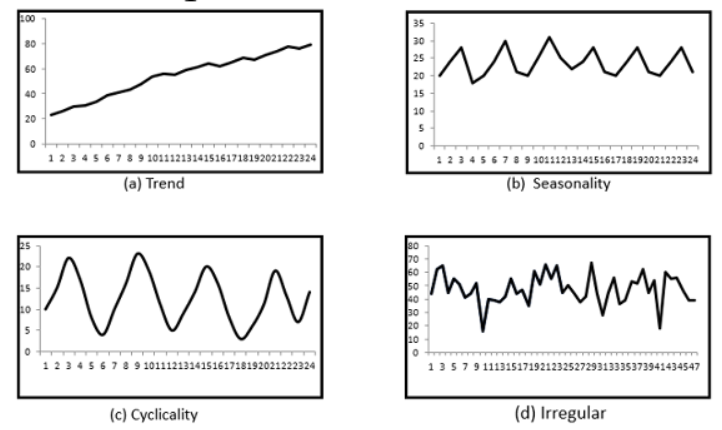


###Time Series terms
* **Stationary Data** - a time series variable exhibiting no significant upward or downward trend over time.
* **Nonstationary Data** - a time series variable exhibiting a significant upward or downward trend over time.
* **Seasonal Data** - a time series variable exhibiting a repeating patterns at regular intervals over time.

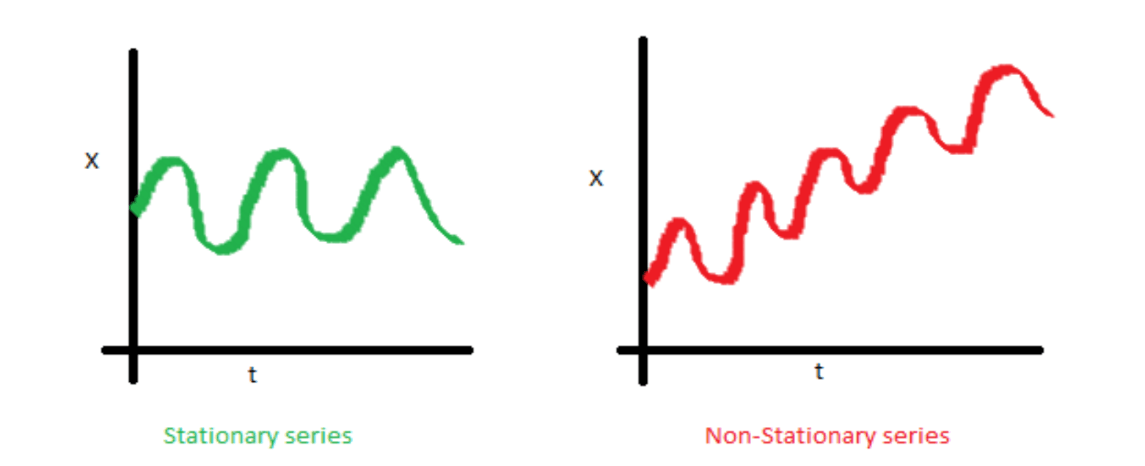



###Approaching TSA
There are many, many different time series techniques.
  - It is usually **impossible to know which technique** will be best for a particular data set.
  - It is customary to **try out several different techniques** and select the one that seems to work **best**.
  - To be an effective time series modeler, you need to keep several time series techniques in your “tool box.”


###Measuring accuracy
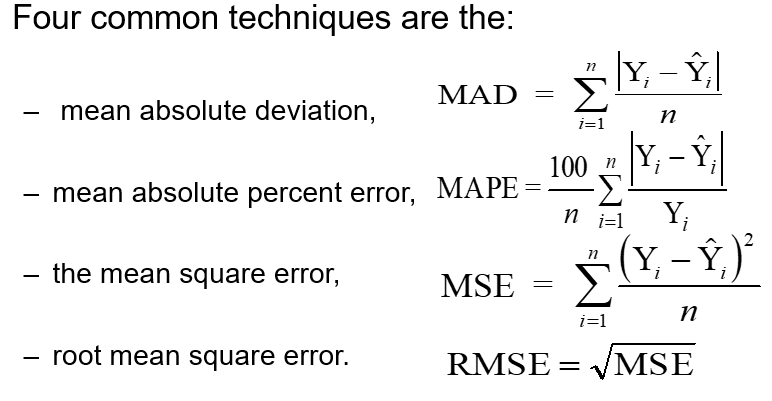

###Fundamentals of TSA

In [ ]:
#1. We can generate the dataset using the numpy library:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

In [ ]:
#Parameters:
#loc
#    float or array_like of floats
#    Mean (“centre”) of the distribution.
#scale
#    float or array_like of floats
#    Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size
#    int or tuple of ints, optional
#    Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars.
#    Otherwise, np.broadcast(loc, scale).size samples are drawn.

#Returns:
#   out:     ndarray or scalar


In [ ]:
#2. Next, we are going to use the seaborn library to plot the time series data.
#Check the code snippet given here:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [ ]:
#We can perform a cumulative sum over the list and then plot the data using a time series plot.
#The plot gives more interesting results. Check the following code snippet:
random_walk = np.cumsum(zero_mean_series)
random_walk

In [ ]:
#4. Now, if we plot the list using the time series plot as shown here, we get an interesting graph that shows the change in values over time:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

###Characteristics of time series data
When working with time series data, there are several unique characteristics that can be observed. In general, time series tend to exhibit the following characteristics:
* When looking at time series data, it is essential to see if there is **any trend**. Observing a trend means that the average measurement values seem either to decrease or increase over time.
* Time series data may contain a notable amount of **outliers**. These outliers can be noted when plotted on a graph.
* Some data in time series tends to repeat over a certain **interval** in some patterns. We refer to such repeating patterns as seasonality.
*Sometimes, there is an **uneven change** in time series data. We refer to such uneven changes as abrupt changes. Observing abrupt changes in time series is essential as it reveals essential underlying phenomena.
*Some series tend to follow **constant variance over time**. Hence, it is essential to look at the time series data and see whether or not the data exhibits constant variance over time.

#TSA with Open Power System Data

In [ ]:
 # load time series dataset
import pandas as pd
# load data
df_power =pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opsd_germany_daily.csv")
df_power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

The columns of the dataframe are described here:
  - Date: The date is in the format yyyy-mm-dd.
  - Consumption: This indicates electricity consumption in GWh.
  - Solar: This indicates solar power production in GWh.
  - Wind+Solar: This represents the sum of solar and wind power production in GWh.

###Data cleaning

In [ ]:
#1. Check the shape of the dataset:
df_power.shape

(4383, 5)

In [ ]:
#2. Check few entries inside the dataframe.
print(df_power.tail(10))
print(df_power.head())

            Consumption     Wind   Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                          
2017-12-22   1423.23782  228.773  10.065     238.838  2017     12       Friday
2017-12-23   1272.17085  748.074   8.450     756.524  2017     12     Saturday
2017-12-24   1141.75730  812.422   9.949     822.371  2017     12       Sunday
2017-12-25   1111.28338  587.810  15.765     603.575  2017     12       Monday
2017-12-26   1130.11683  717.453  30.923     748.376  2017     12      Tuesday
2017-12-27   1263.94091  394.507  16.530     411.037  2017     12    Wednesday
2017-12-28   1299.86398  506.424  14.162     520.586  2017     12     Thursday
2017-12-29   1295.08753  584.277  29.854     614.131  2017     12       Friday
2017-12-30   1215.44897  721.247   7.467     728.714  2017     12     Saturday
2017-12-31   1107.11488  721.176  19.980     741.156  2017     12       Sunday
            Consumption  Wind  Solar  Wind+Solar  Ye

In [ ]:
#3. The data types of each column in our df_power dataframe:
df_power.dtypes

,0
Date,object
Consumption,float64
Wind,float64
Solar,float64
Wind+Solar,float64


In [ ]:
#4. Note that the Date column has a data type of object.
#This is not correct. So, the next step is to correct the Date column
#convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])
df_power.dtypes


,0
Date,datetime64[ns]
Consumption,float64
Wind,float64
Solar,float64
Wind+Solar,float64


In [ ]:
#6. Let's next change the index of our dataframe to the Date column
df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [ ]:
#7. We can simply verify this by using
df_power.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
#8. Since our index is the DatetimeIndex object, now we can use it to analyze the dataframe. Let's add more columns to our dataframe to make our lives easier. Let's add Year, Month, and Weekday Name:
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()


In [ ]:
#9. Let's display five random rows from the dataframe:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


###Time-based indexing

In [ ]:
#Time-based indexing is a very powerful method of the pandas library when it comes to time series data.
#Having time-based indexing allows using a formatted string to select data.
df_power.loc['2015-10-02']


,2015-10-02
Consumption,1391.05
Wind,81.229
Solar,160.641
Wind+Solar,241.87
Year,2015
Month,10
Weekday Name,Friday


###Visualizing time series

In [ ]:
#1. The first step is to import the seaborn and matplotlib libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}) #Runtime Configuration
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

<Axes: xlabel='Date'>

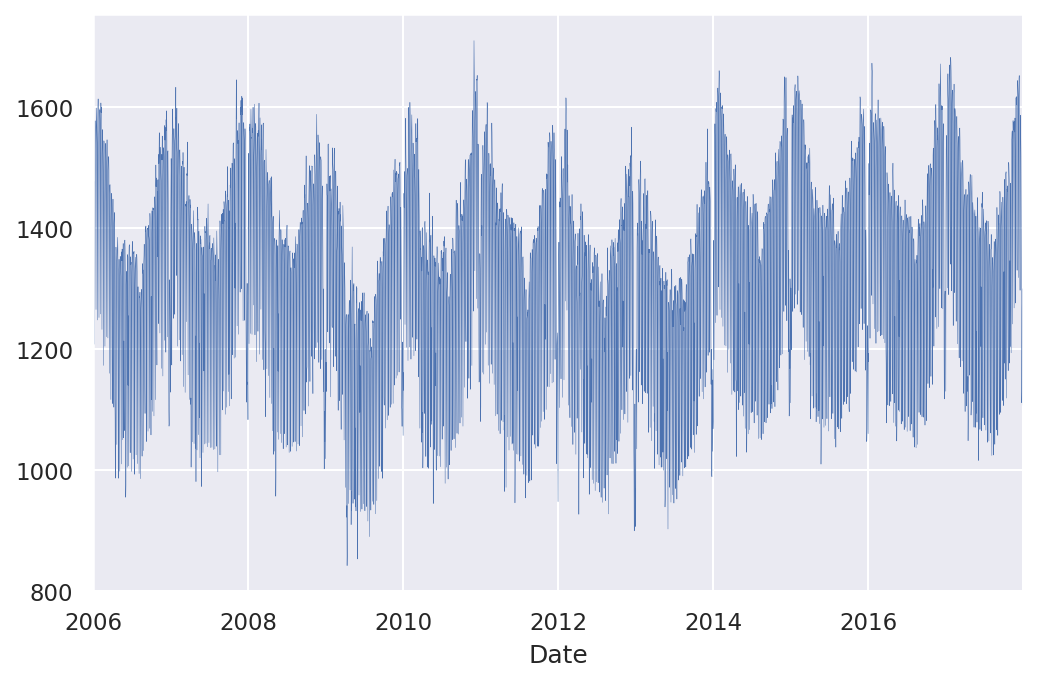

In [ ]:
#2. Next, let's generate a line plot of the full time series of Germany's daily electricity consumption:
df_power['Consumption'].plot(linewidth=0.25)


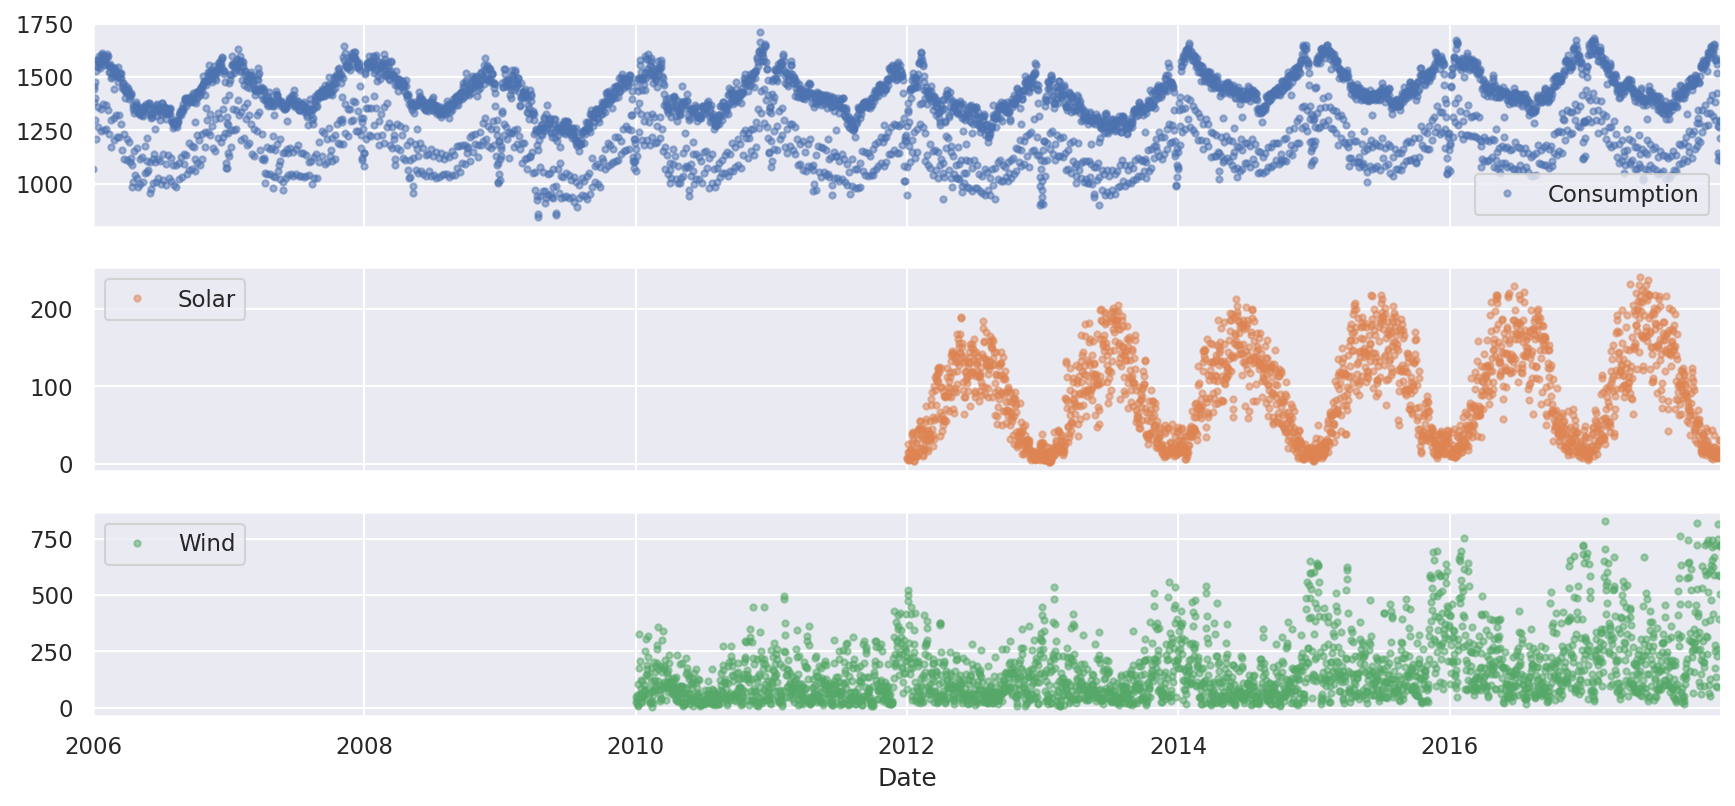

In [ ]:
#3. Let's use the dots to plot the data for all the other columns:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)   #True for subplots
#for ax in axes:
#  ax.set_ylabel('Daily Totals (GWh)')


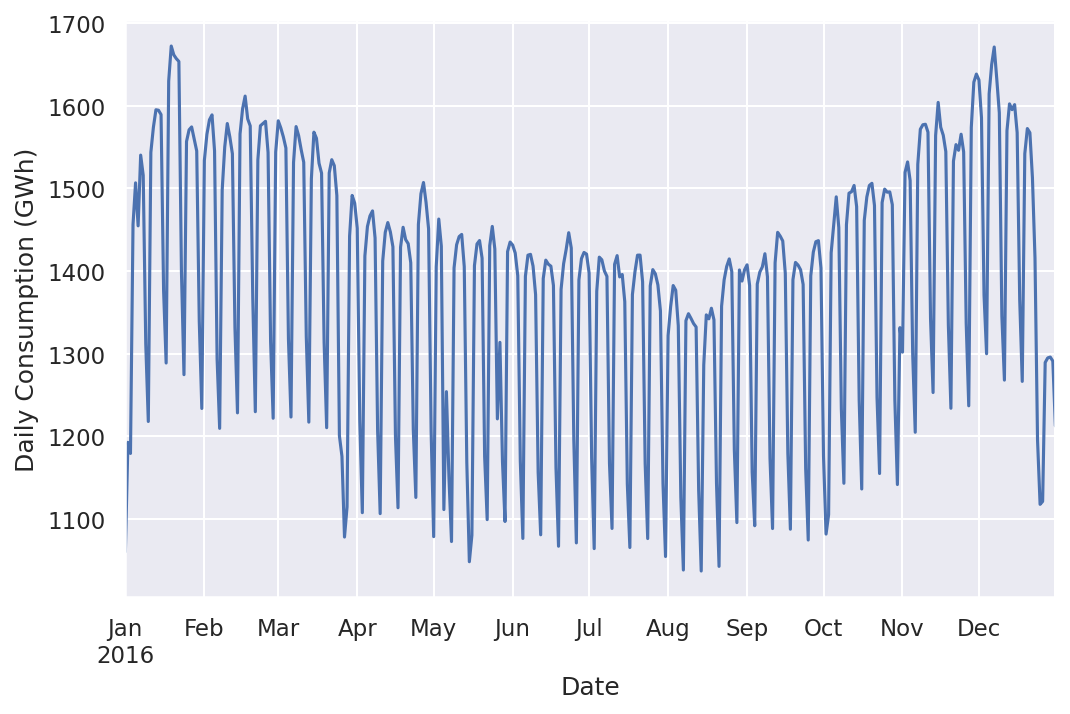

In [ ]:
#4. We can further investigate a single year to have a closer look. Check the code given here:
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');


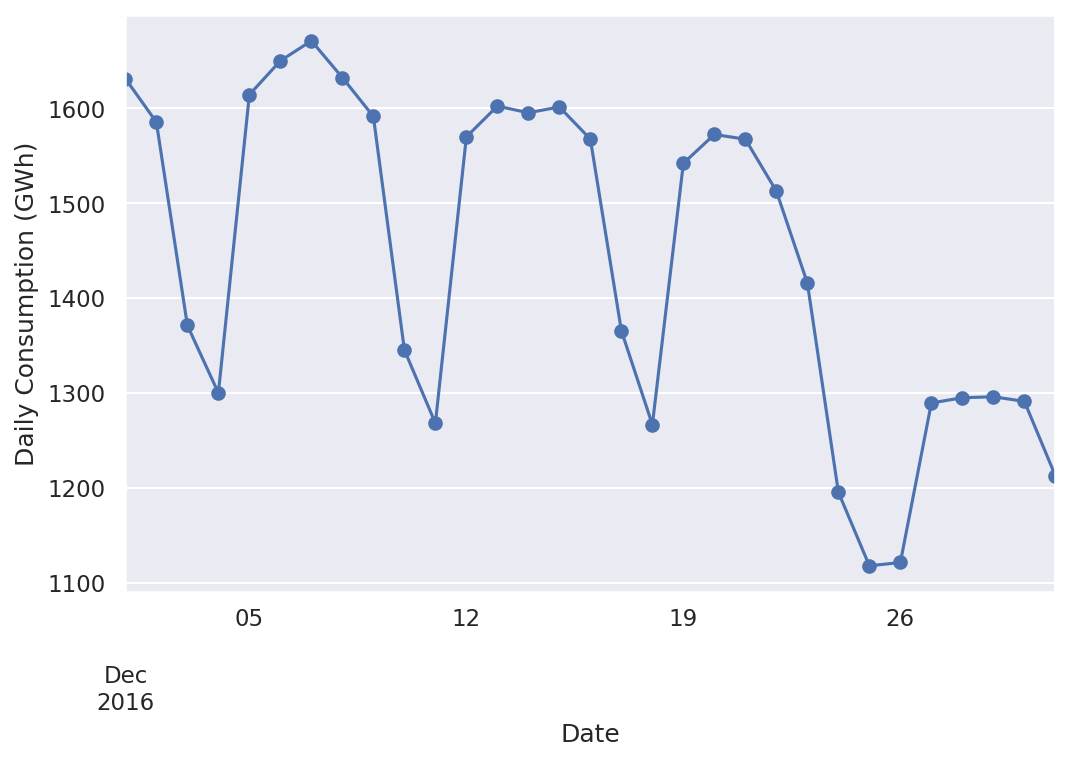

In [ ]:
#Let's examine the month of December 2016 with the following code block:
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

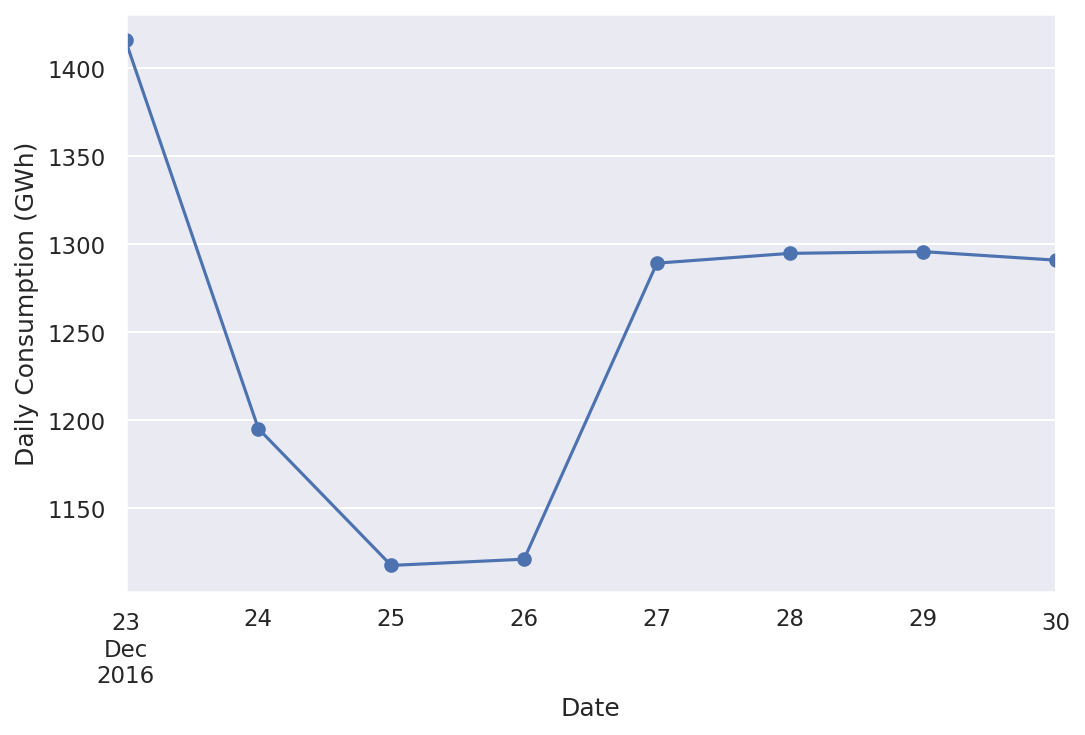

In [ ]:
#In order to indicate a particular week of December, we can supply a specific date range as shown here:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

###Grouping time series data


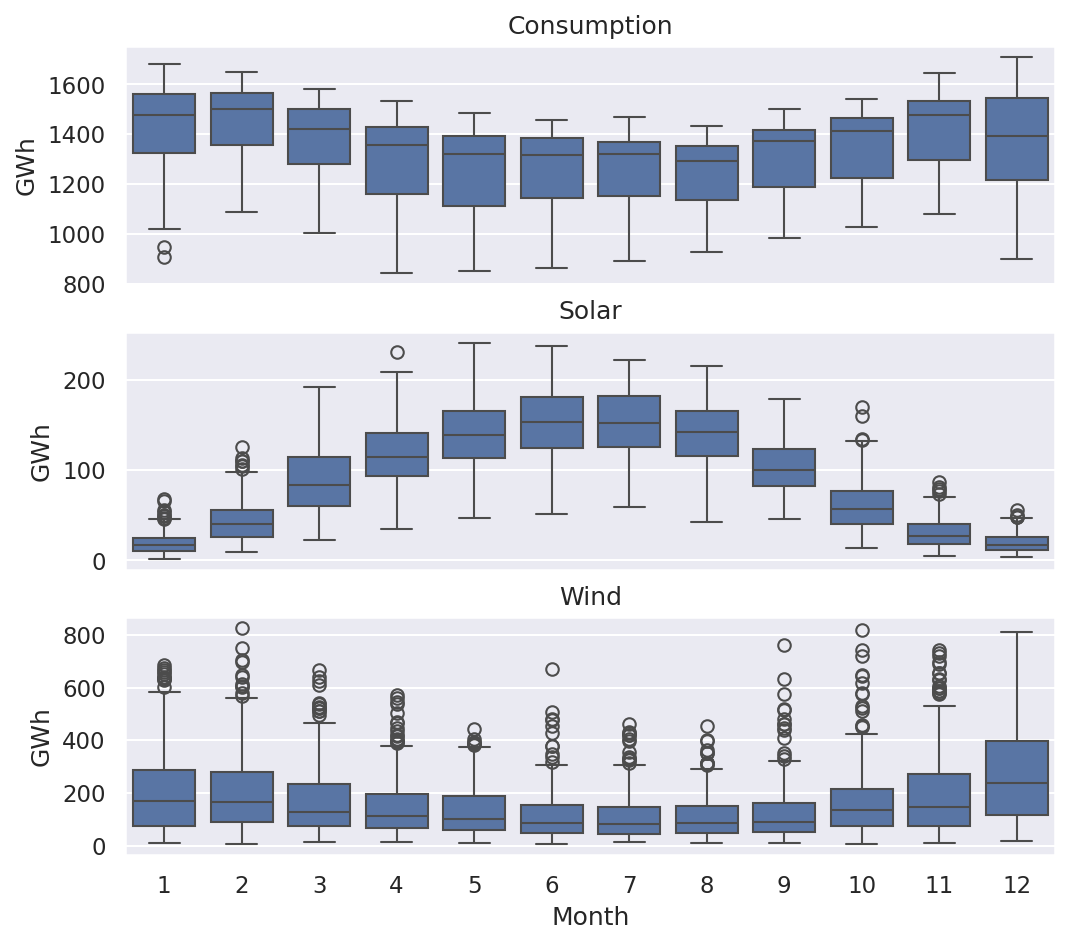

In [ ]:
#1. We can first group the data by months and then use the box plots to visualize the data:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

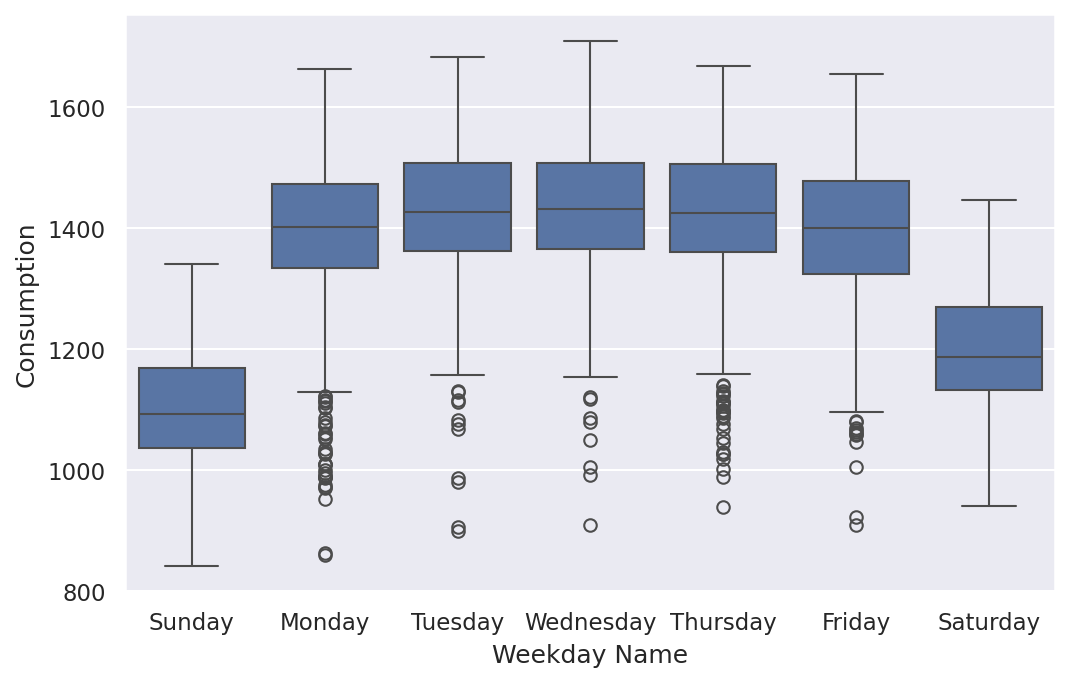

In [ ]:
#2. Next, we can group the consumption of electricity by the day of the week, and present it in a box plot:
sns.boxplot(data=df_power, x='Weekday Name', y='Consumption');


###Resampling time series data

In [ ]:
#1. We can use the code given here to resample our data:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [ ]:
#2. Let's see the last six months of 2016. Let's start by initializing the variable:
start, end = '2016-01', '2016-06'

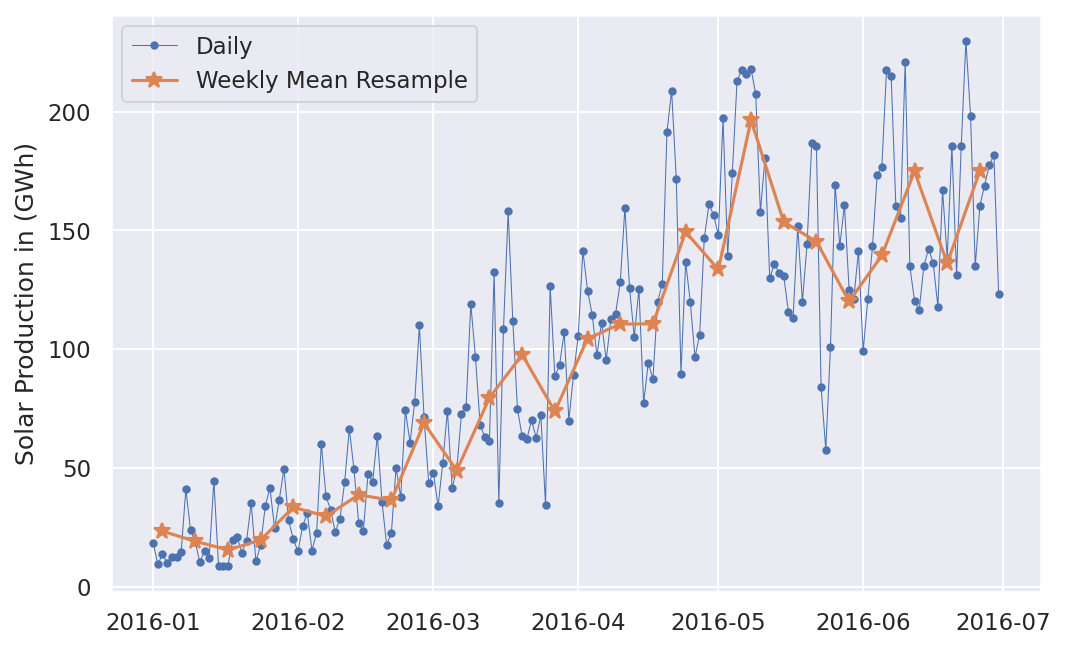

In [ ]:
#3. Next, let's plot the graph using the code given here:
fig, ax = plt.subplots()
ax.plot(df_power.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'], marker='*', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();